# Domestic Profit and Worldwide Profit vs Studio

In [3]:
import pandas as pd 

# Box Office Mojo DB

In [14]:
#chart 1

BOM = pd.read_csv("zippedData/bom.movie_gross.csv") 

BOM 

#drop unnecessary columns and concat columns that are relevant 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# Movie Budgets

In [15]:
#chart 6

MB = pd.read_csv("zippedData/tn.movie_budgets.csv")
MB

# worldwide_gross - production_budget = total_profit...include those types of genres 
# and directors while considering which types of movies to make 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# Merging (joining) chart 1 and 6

In [16]:
joined_df_1_6 = pd.merge(BOM, MB, 
                        left_on = 'title',
                        right_on = 'movie')

joined_df_1_6

#specifically looking at 3 financial cols at the end VS studio col

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [17]:
joined_df_1_6.isna().sum()

#finding missing values

title                  0
studio                 1
domestic_gross_x       2
foreign_gross        161
year                   0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
dtype: int64

# Data Cleaning joined chart 1 and 6

In [18]:
#specifically looking at 3 financial cols at the end VS studio col

#take out $ and commas with replace function so we can only have int's

joined_df_1_6['production_budget'] = joined_df_1_6['production_budget'].apply(lambda x: x.replace('$',''))
joined_df_1_6['worldwide_gross'] = joined_df_1_6['worldwide_gross'].apply(lambda x: x.replace(',',''))

joined_df_1_6['domestic_gross_y'] = joined_df_1_6['domestic_gross_y'].apply(lambda x: x.replace('$',''))
joined_df_1_6['domestic_gross_y'] = joined_df_1_6['domestic_gross_y'].apply(lambda x: x.replace(',',''))

joined_df_1_6['worldwide_gross'] = joined_df_1_6['worldwide_gross'].apply(lambda x: x.replace('$',''))
joined_df_1_6['production_budget'] = joined_df_1_6['production_budget'].apply(lambda x: x.replace(',',''))

joined_df_1_6

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,4286367,6089100
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,3703182,9633111
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,490973,648599
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1214525,1427656


In [19]:
#convert strings to int's (can't work with str's to do numerical analysis)

joined_df_1_6['production_budget'] = joined_df_1_6.production_budget.apply(lambda x: int(x))

joined_df_1_6['worldwide_gross'] = joined_df_1_6.worldwide_gross.apply(lambda x: int(x))

joined_df_1_6

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,4286367,6089100
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,3703182,9633111
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,490973,648599
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1214525,1427656


In [29]:
joined_df_1_6['domestic_profit']= joined_df_1_6['domestic_gross_y'] - joined_df_1_6['production_budget']

joined_df_1_6['worldwide_profit'] = joined_df_1_6['worldwide_gross'] - joined_df_1_6['production_budget']

joined_df_1_6

#did the math and added 2 profit columns to the end 

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,domestic_profit,worldwide_profit
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,215004880,868879522
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642,132576195,675524642
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673,73736787,591244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828,232531751,638102828
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389,142433331,451156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,4286367,6089100,-5713633,-3910900
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,3703182,9633111,-9296818,-3366889
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,490973,648599,-29509027,-29351401
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1214525,1427656,-4785475,-4572344


In [30]:
#then do the equation...estimated net gross (profit??) worldwide = worldwide gross - production budget 

# AND estimated net gross profit domestic = domestic gross - production budget

net_worldwide = joined_df_1_6['worldwide_gross'] - joined_df_1_6['production_budget']

net_worldwide

0       868879522
1       675524642
2       591244673
3       638102828
4       451156389
          ...    
1242     -3910900
1243     -3366889
1244    -29351401
1245     -4572344
1246     -5544973
Length: 1247, dtype: int64

In [23]:
joined_df_1_6['domestic_gross_y'] = joined_df_1_6.domestic_gross_y.apply(lambda x: int(x))

#^ converted str to int via lambda functions so we can do math with it

net_domestic = joined_df_1_6['domestic_gross_y'] - joined_df_1_6['production_budget'] 

net_domestic

#^found net estimated profit for domestic sales 

0       215004880
1       132576195
2        73736787
3       232531751
4       142433331
          ...    
1242     -5713633
1243     -9296818
1244    -29509027
1245     -4785475
1246     -6836944
Length: 1247, dtype: int64

In [24]:
joined_df_1_6.studio.value_counts()   #shows how many times a thing is in the df 

Uni.    117
Fox     110
WB      102
Sony     74
Par.     74
       ... 
ATO       1
BBC       1
IM        1
PNT       1
Viv.      1
Name: studio, Length: 99, dtype: int64

In [31]:
joined_df_1_6.groupby('studio').mean().sort_values(by = 'domestic_profit')

#avg of the money each studio made 

,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross,domestic_profit,worldwide_profit
studio,,,,,,,,
NM,6.190000e+05,2010.000000,49.000000,7.000000e+07,6.194230e+05,3.899229e+07,-6.938058e+07,-3.100771e+07
Free,1.052667e+05,2011.333333,53.666667,3.416667e+07,1.055237e+05,8.597328e+06,-3.406114e+07,-2.556934e+07
BSC,6.700000e+06,2015.000000,21.000000,4.000000e+07,6.738000e+06,2.673666e+07,-3.326200e+07,-1.326334e+07
EOne,4.484333e+05,2014.333333,44.000000,2.786667e+07,4.510527e+05,3.696579e+07,-2.741561e+07,9.099122e+06
ALP,2.800000e+03,2011.000000,52.000000,2.600000e+07,4.247200e+04,2.923959e+06,-2.595753e+07,-2.307604e+07
...,...,...,...,...,...,...,...,...
WB (NL),9.237027e+07,2014.162162,48.513514,5.807027e+07,9.236838e+07,2.308342e+08,3.429811e+07,1.727639e+08
P/DW,1.682900e+08,2010.900000,43.900000,1.334000e+08,1.682915e+08,5.078028e+08,3.489147e+07,3.744028e+08
Uni.,9.205759e+07,2013.914530,52.965812,5.639060e+07,9.151146e+07,2.335837e+08,3.512086e+07,1.771931e+08


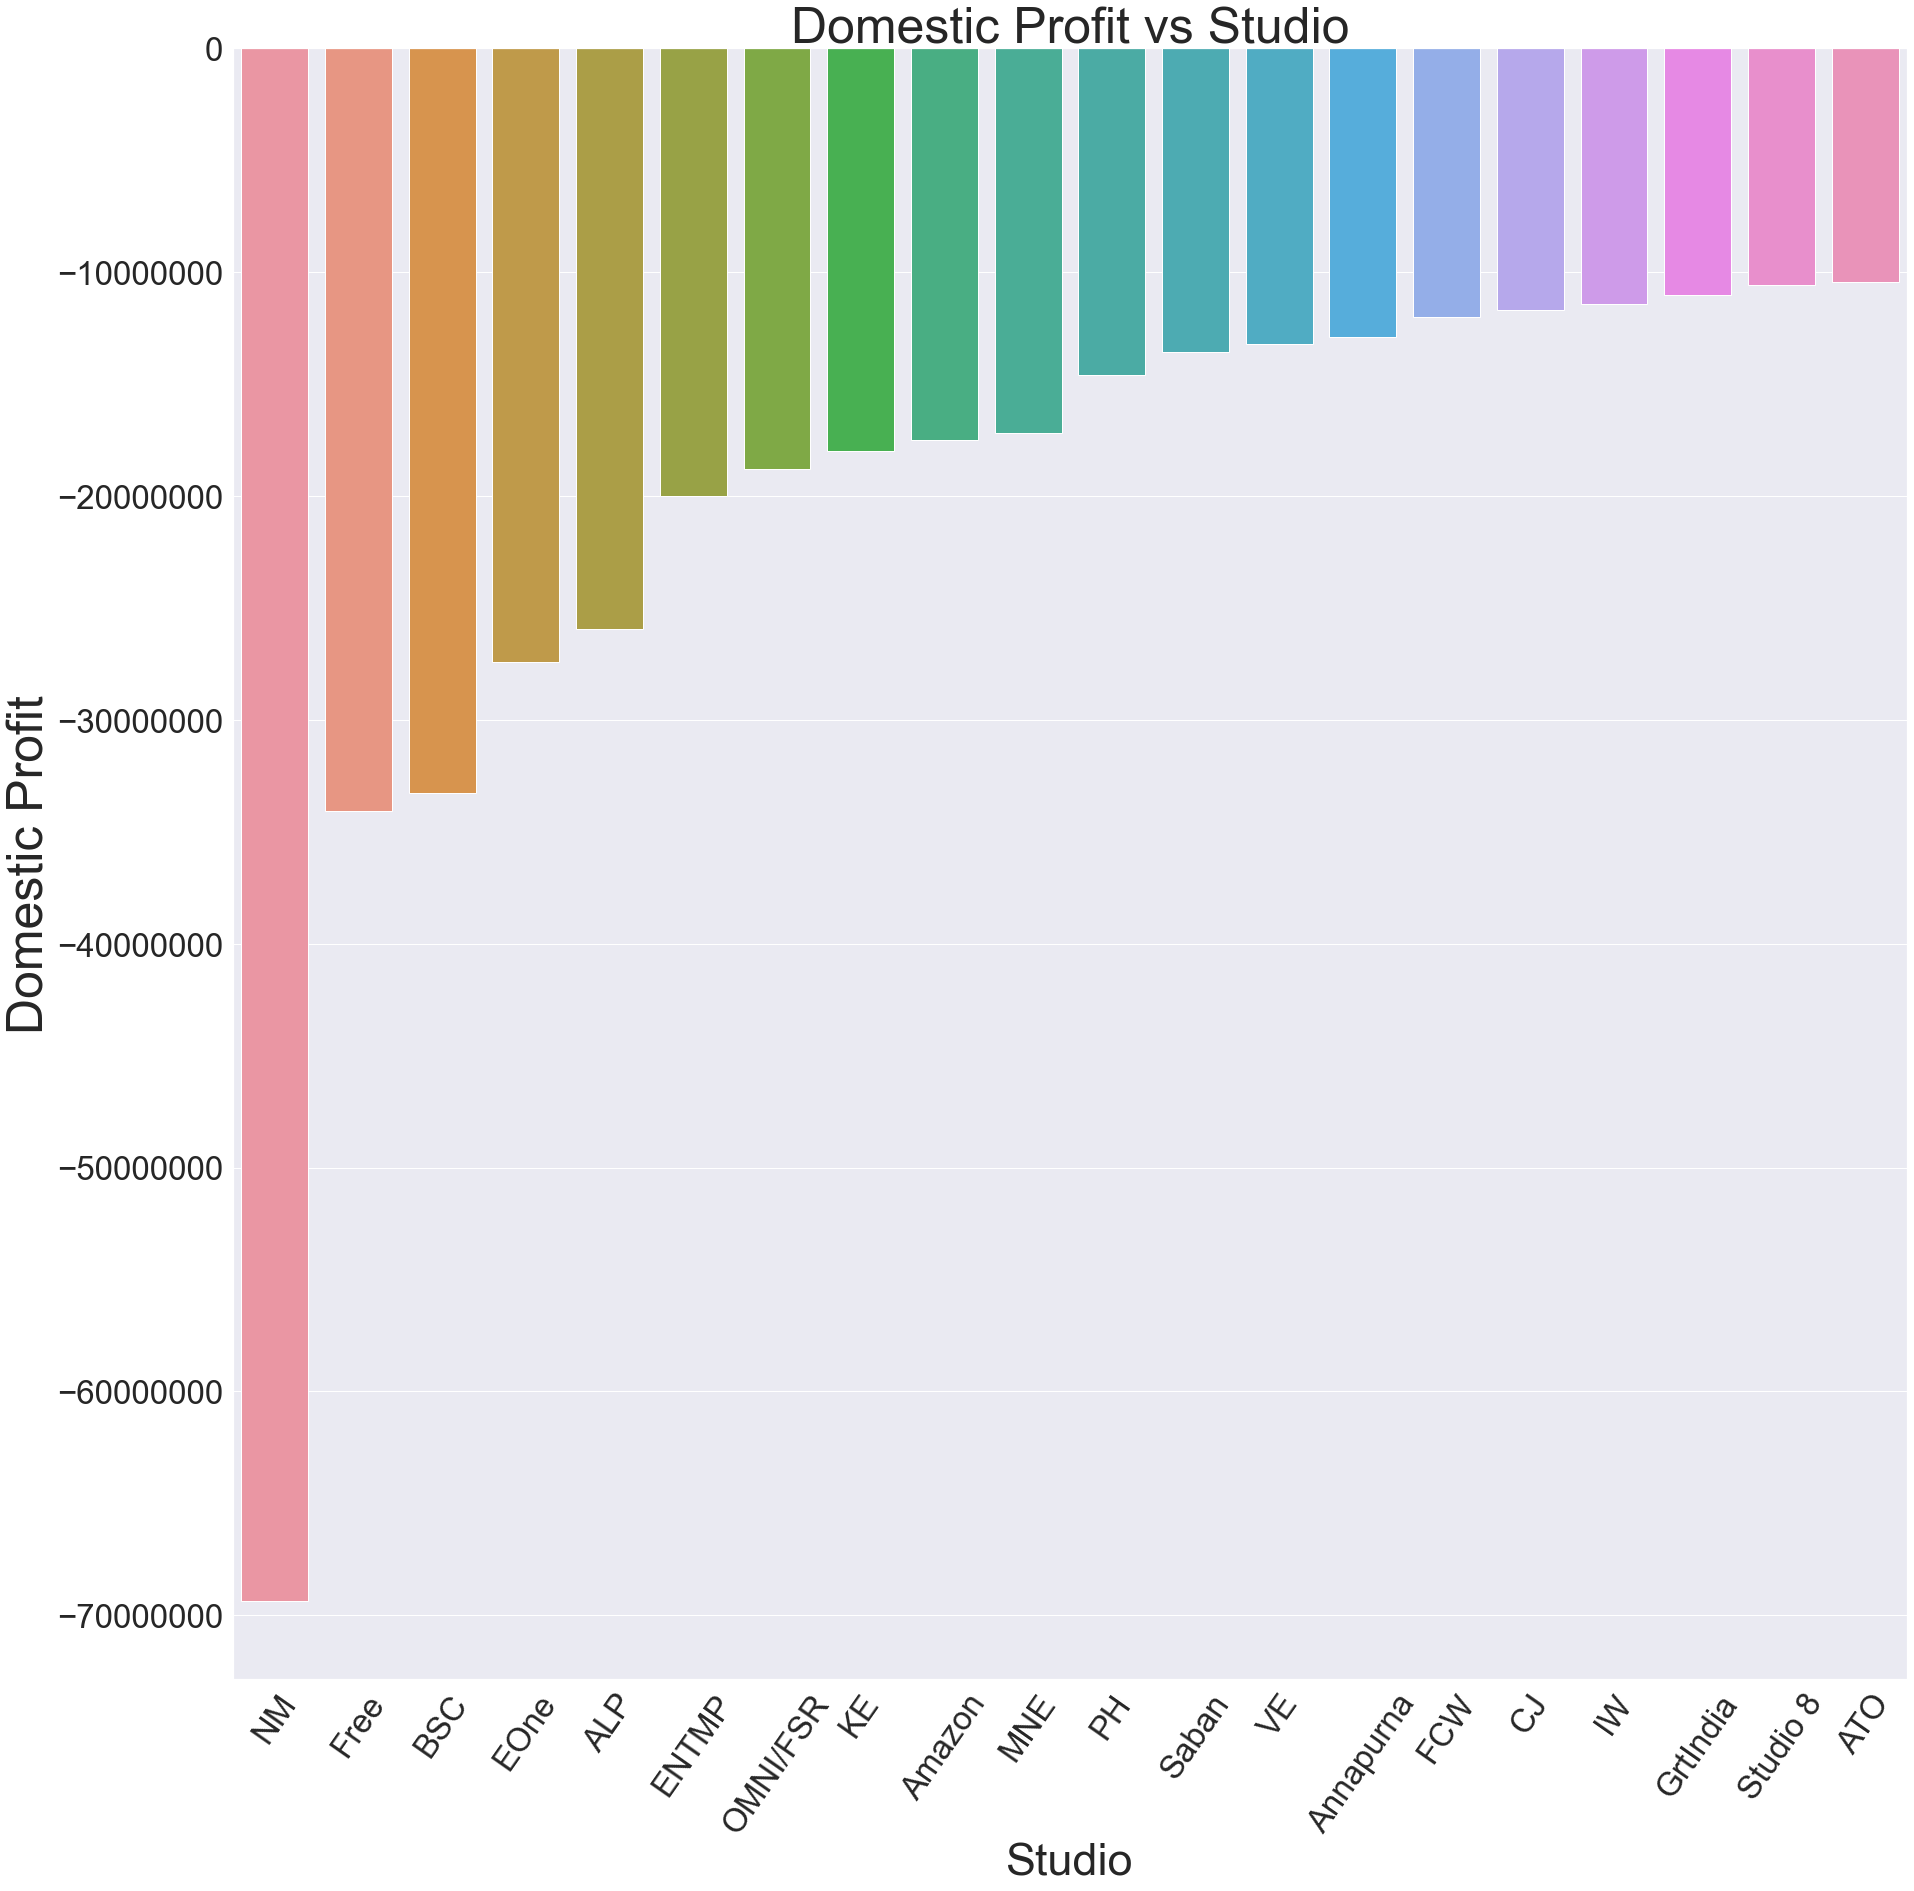

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

fig ,ax = plt.subplots(figsize= (30,30))
ax.set_title('Studio vs Domestic Profit')
sns.barplot(x = 'studio' ,y = 'domestic_profit',data = joined_df_1_6.groupby('studio').mean().sort_values(by = 'domestic_profit', ascending = True).reset_index().head(20))
plt.xticks(rotation = 55) #makes the x axis more vertical
ax.set_xlabel("Studio", fontsize = 45)  #labels the axes
ax.set_ylabel("Domestic Profit", fontsize =50)
ax.set_title('Domestic Profit vs Studio', fontsize = 50)

ax.ticklabel_format(style='plain', axis='y') 
plt.show()

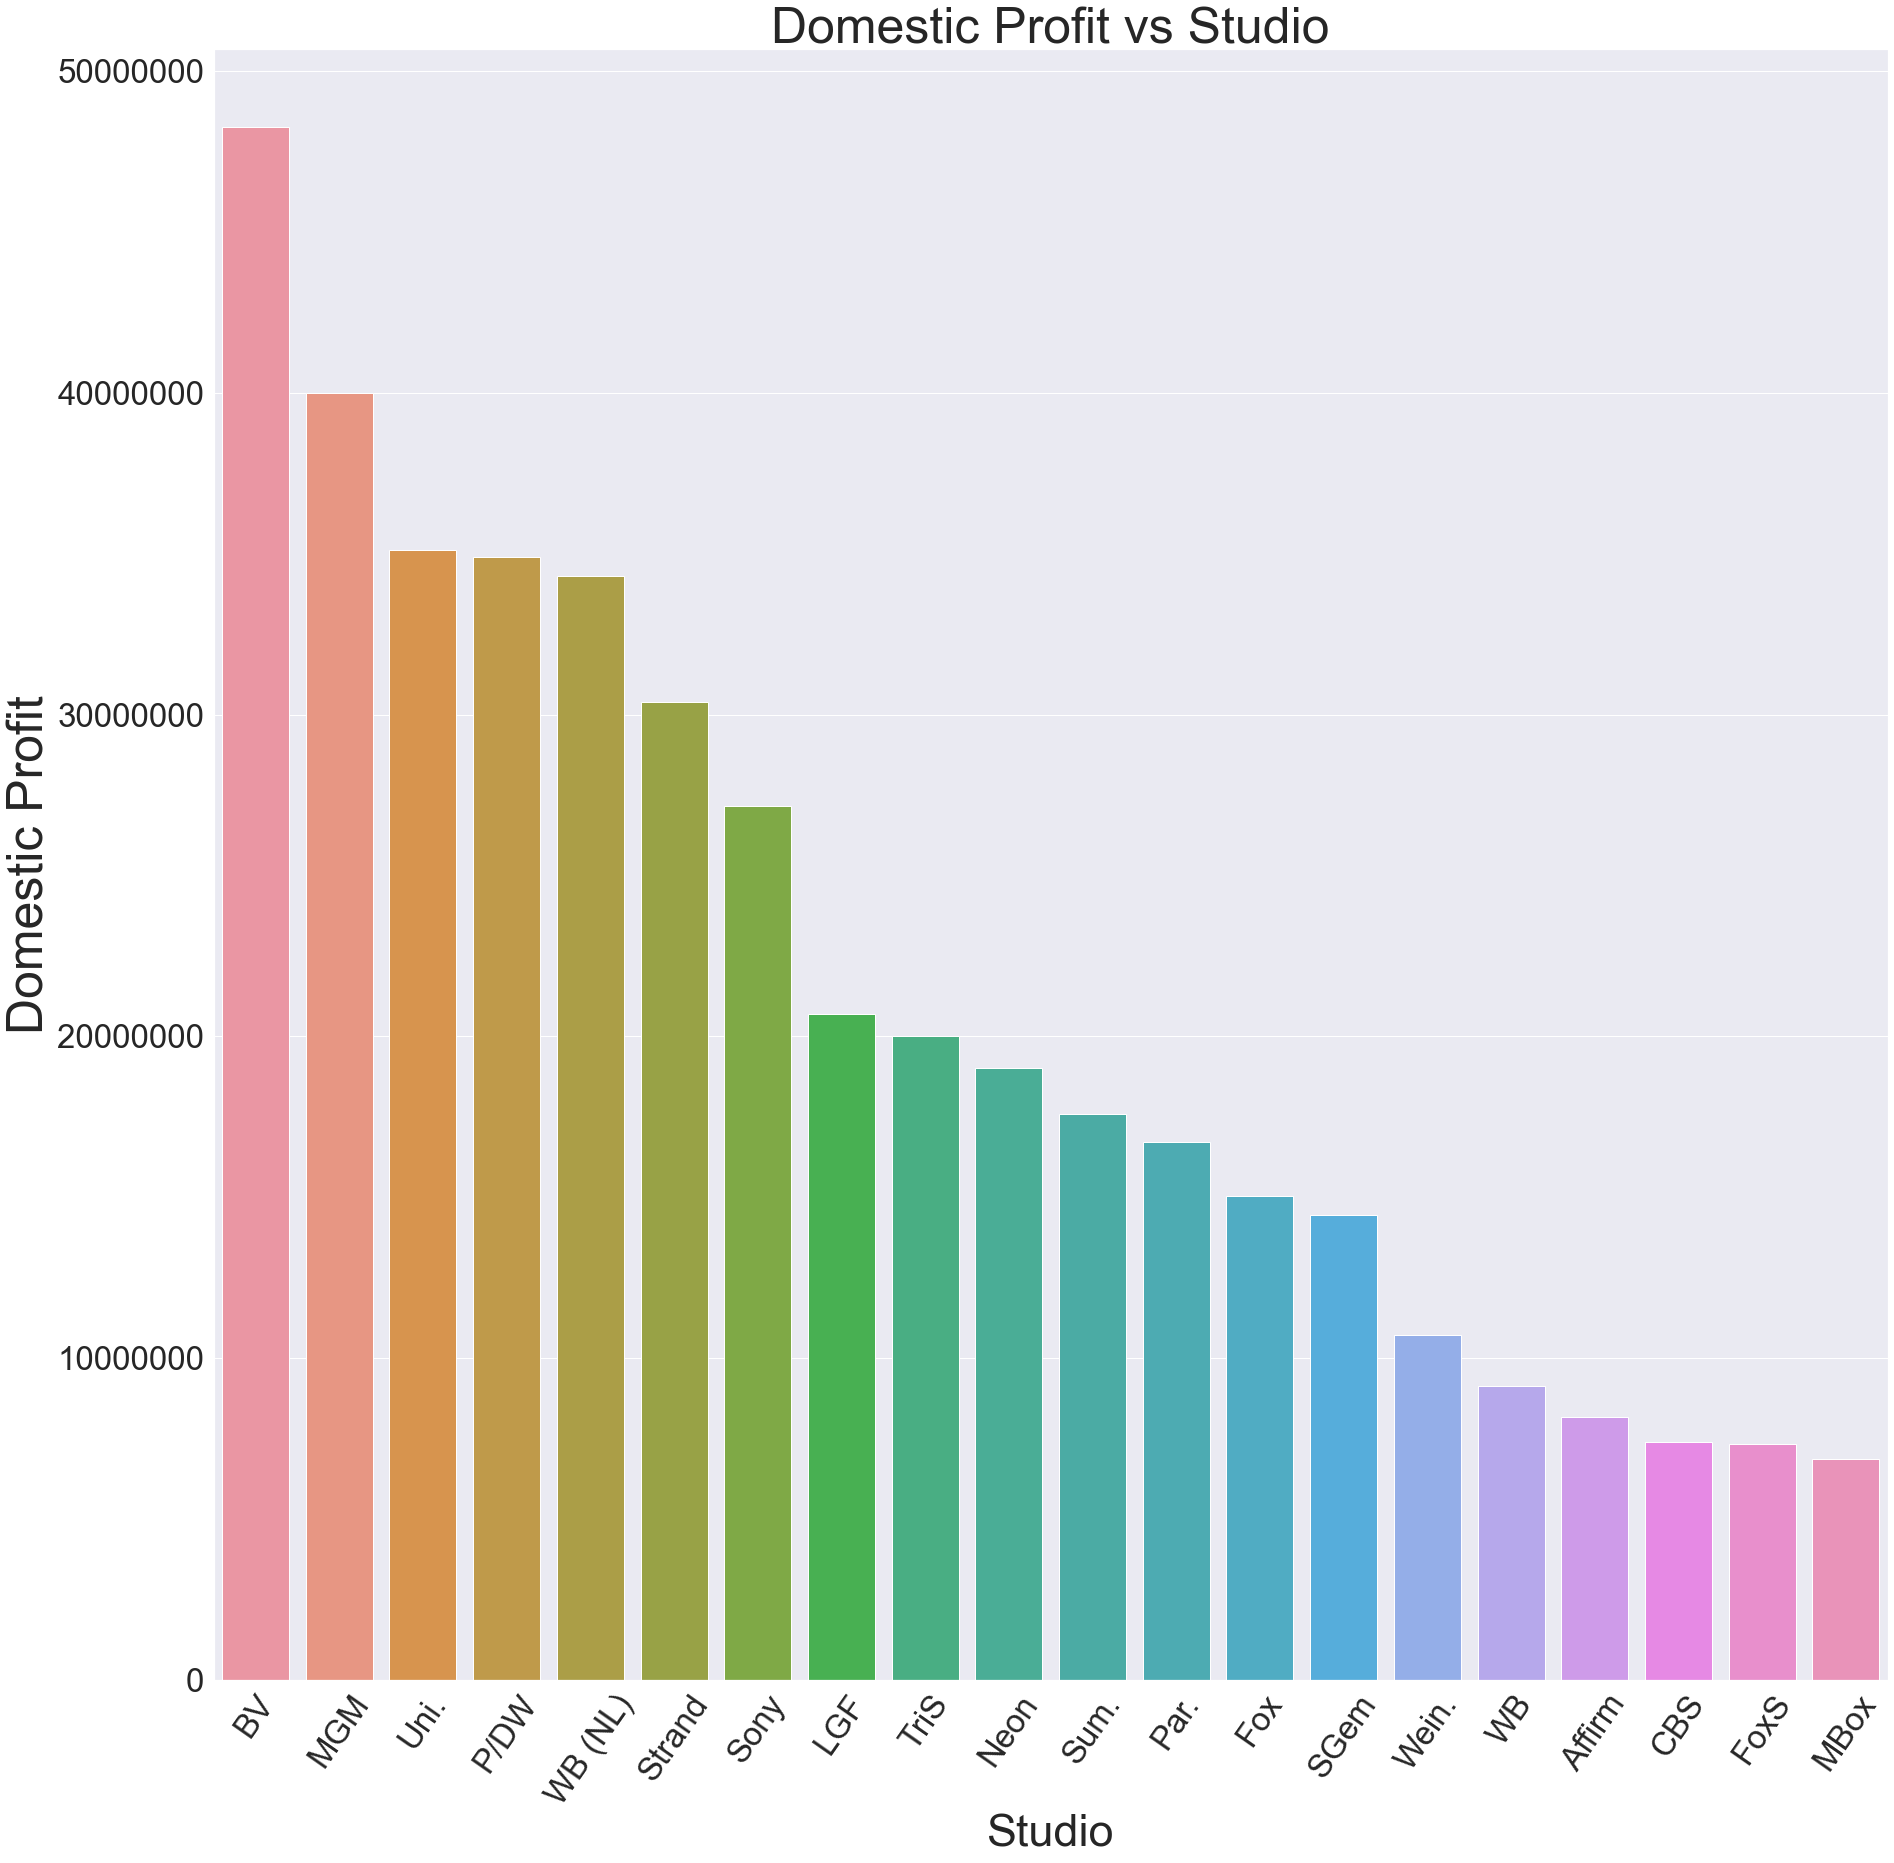

In [109]:
fig ,ax = plt.subplots(figsize= (30,30))
ax.set_title('Studio vs Domestic Profit')
sns.barplot(x = 'studio' ,y = 'domestic_profit',data = joined_df_1_6.groupby('studio').mean().sort_values(by = 'domestic_profit', ascending = False).reset_index().head(20))
plt.xticks(rotation = 55) #makes the x axis more vertical
ax.set_xlabel("Studio", fontsize = 45)  #labels the axes
ax.set_ylabel("Domestic Profit", fontsize =50)
ax.set_title('Domestic Profit vs Studio', fontsize = 50)

ax.ticklabel_format(style='plain', axis='y') 
plt.show()

In [81]:
joined_df_1_6.keys()

#looking at keys in the dictionary

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'domestic_profit', 'worldwide_profit'],
      dtype='object')

In [84]:
joined_df_1_6.groupby('studio').sum().sort_values(by='domestic_profit', ascending=False)

,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross,domestic_profit,worldwide_profit
studio,,,,,,,,
Uni.,1.077074e+10,235628,6197,6597700000,10706840840,27329288200,4109140840,20731588200
BV,1.292690e+10,145001,2889,9450800000,12926142171,33286017937,3475342171,23835217937
Sony,7.146000e+09,149004,3908,5050500000,7059959451,17601810459,2009459451,12551310459
Fox,9.306400e+09,221510,5051,7755500000,9410233951,26795813328,1654733951,19040313328
WB (NL),3.417700e+09,74524,1795,2148600000,3417630150,8540864247,1269030150,6392264247
...,...,...,...,...,...,...,...,...
RAtt.,1.763740e+08,50331,1161,272350000,176504661,385081994,-95845339,112731994
Free,3.158000e+05,6034,161,102500000,316571,25791984,-102183429,-76708016
Magn.,9.741900e+06,40230,1114,151320000,6596642,61223206,-144723358,-90096794


In [38]:
joined_df_1_6.studio.value_counts()   #shows how many times a thing is in the df 

Uni.    117
Fox     110
WB      102
Sony     74
Par.     74
       ... 
ATO       1
BBC       1
IM        1
PNT       1
Viv.      1
Name: studio, Length: 99, dtype: int64

In [87]:
joined_df_1_6

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,domestic_profit,worldwide_profit
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,215004880,868879522
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642,132576195,675524642
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673,73736787,591244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828,232531751,638102828
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389,142433331,451156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,4286367,6089100,-5713633,-3910900
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,3703182,9633111,-9296818,-3366889
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,490973,648599,-29509027,-29351401
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1214525,1427656,-4785475,-4572344


In [93]:
#1st line of code groups data by the studio compared to domestic profit, in descending order 

xc = joined_df_1_6.groupby('studio').sum().sort_values(by='domestic_profit', ascending=False)
xc =xc['domestic_profit']
xc = xc[xc['studio'] == ‘Photo’].sort_values(by=‘likes_per_impression’, ascending = False)

studio
Uni.       4109140840
BV         3475342171
Sony       2009459451
Fox        1654733951
WB (NL)    1269030150
              ...    
RAtt.       -95845339
Free       -102183429
Magn.      -144723358
IFC        -145610147
LG/S       -158544942
Name: domestic_profit, Length: 99, dtype: int64

In [142]:
#renaming the studio abbreviations by their full names 

studio_names = {
    'P/DW' : 'Dreamworks',
    'BV'   : 'Disney',
    'GrtIndia': 'GrtIndia',
    'Uni.' : 'Universal',
    'Fox':  'Fox',
    'WB (NL)':'WB NewLine',
    'Sony' : 'Sony',
    'WB' : 'WB',
    'Par.': 'Paramount',
    'Strand': 'Strand',
    'MGM': 'MGM',
    'UTV': 'UTV',
    'Sum.': 'Summit',
    'MBox': 'MBox'
    
}

datas = joined_df_1_6.groupby('studio').mean().sort_values(by = 'worldwide_profit', ascending = False).reset_index().head(14)
datas['studio'] = datas['studio'].map(studio_names)
datas

,studio,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross,domestic_profit,worldwide_profit
0,Dreamworks,1.682900e+08,2010.900000,43.900000,1.334000e+08,1.682915e+08,5.078028e+08,3.489147e+07,3.744028e+08
1,Disney,1.795403e+08,2013.902778,40.125000,1.312611e+08,1.795298e+08,4.623058e+08,4.826864e+07,3.310447e+08
2,GrtIndia,2.020000e+07,2017.000000,55.000000,3.000000e+07,1.898579e+07,2.635029e+08,-1.101421e+07,2.335029e+08
3,Universal,9.205759e+07,2013.914530,52.965812,5.639060e+07,9.151146e+07,2.335837e+08,3.512086e+07,1.771931e+08
4,Fox,8.460364e+07,2013.727273,45.918182,7.050455e+07,8.554758e+07,2.435983e+08,1.504304e+07,1.730938e+08
5,WB NewLine,9.237027e+07,2014.162162,48.513514,5.807027e+07,9.236838e+07,2.308342e+08,3.429811e+07,1.727639e+08
6,Sony,9.656757e+07,2013.567568,52.810811,6.825000e+07,9.540486e+07,2.378623e+08,2.715486e+07,1.696123e+08
7,WB,9.011667e+07,2013.715686,55.117647,8.036961e+07,8.951498e+07,2.175864e+08,9.145371e+06,1.372168e+08
8,Paramount,8.160946e+07,2013.797297,51.891892,6.445946e+07,8.117842e+07,1.951109e+08,1.671896e+07,1.306514e+08
9,Strand,2.080000e+05,2010.000000,68.000000,4.500000e+07,7.539504e+07,1.742782e+08,3.039504e+07,1.292782e+08


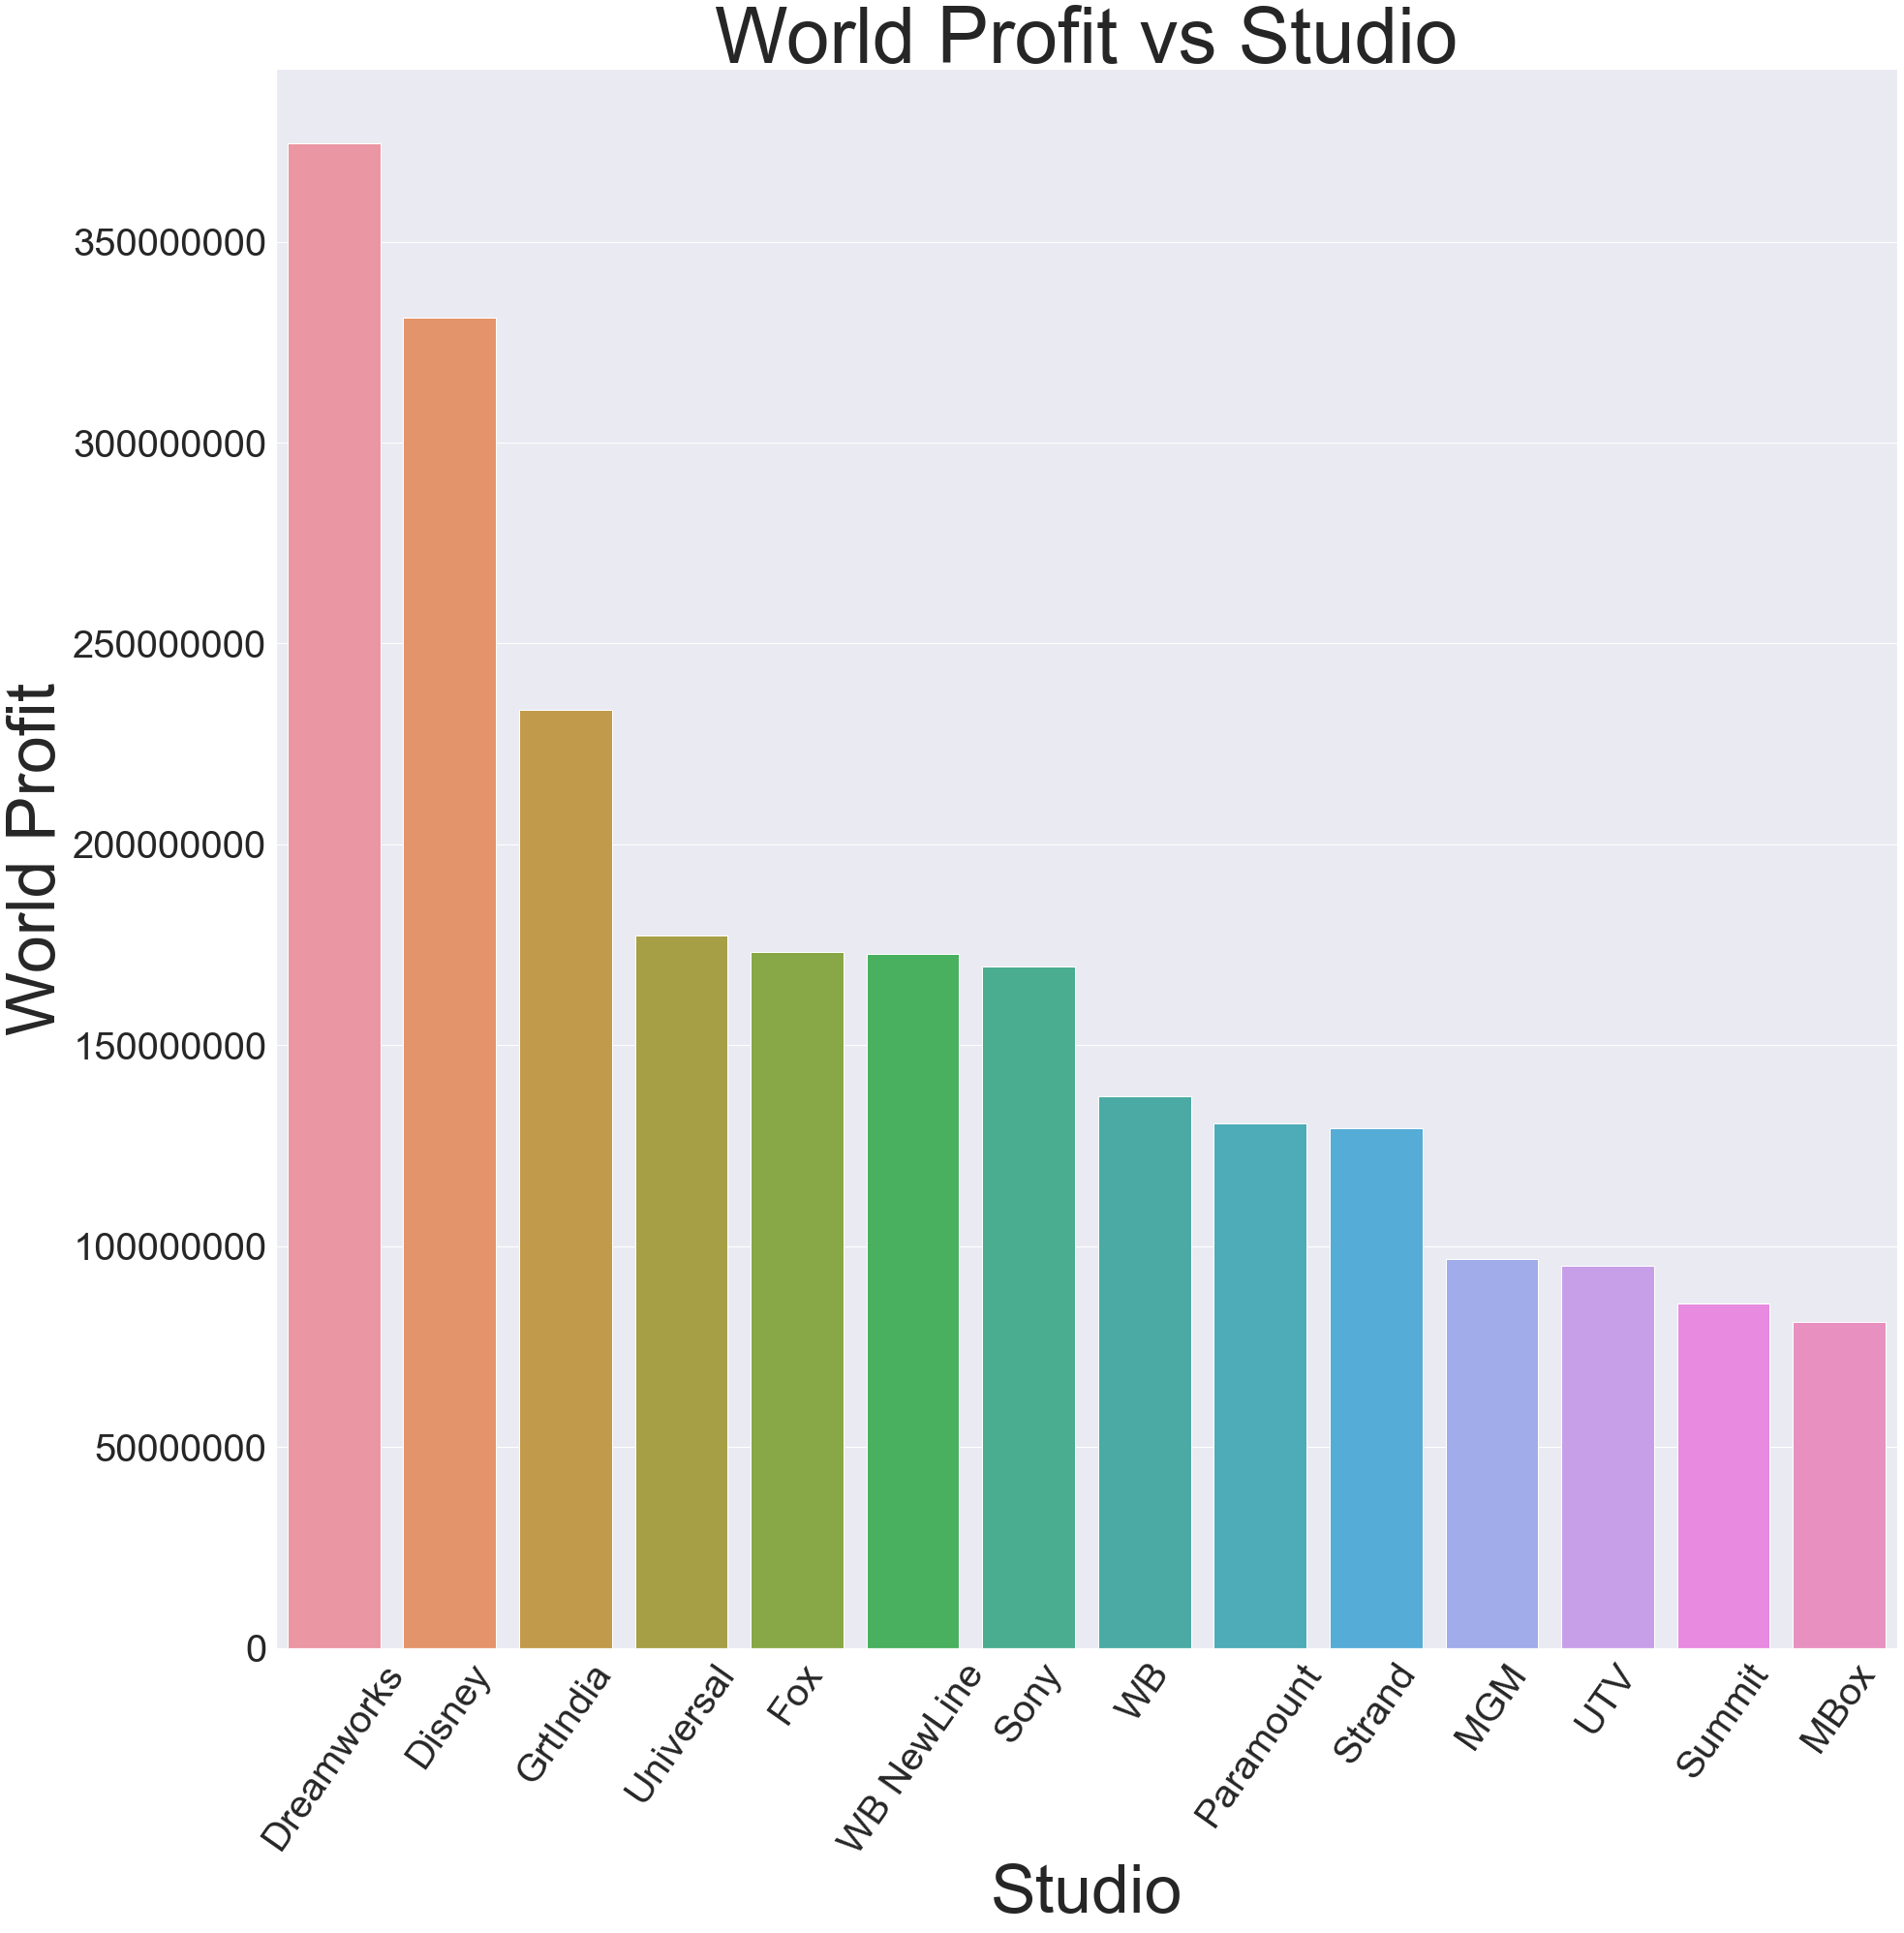

In [143]:
#bar graph for worldwide profit vs studio 

fig ,ax = plt.subplots(figsize= (30,30))
ax.set_title('Worldwide Profit vs Studio')
sns.set(font_scale = 3)
sns.barplot(x = 'studio' ,y = 'worldwide_profit',data = datas)
#sns_plot = sns.lineplot(color='blue', linewidth=2.5)
plt.xticks(rotation = 55) #makes the x axis more vertical
ax.set_xlabel("Studio", fontsize = 70)  #labels the axes
ax.set_ylabel("World Profit", fontsize =70)
ax.set_title('World Profit vs Studio', fontsize = 80)

plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue

plt.show()

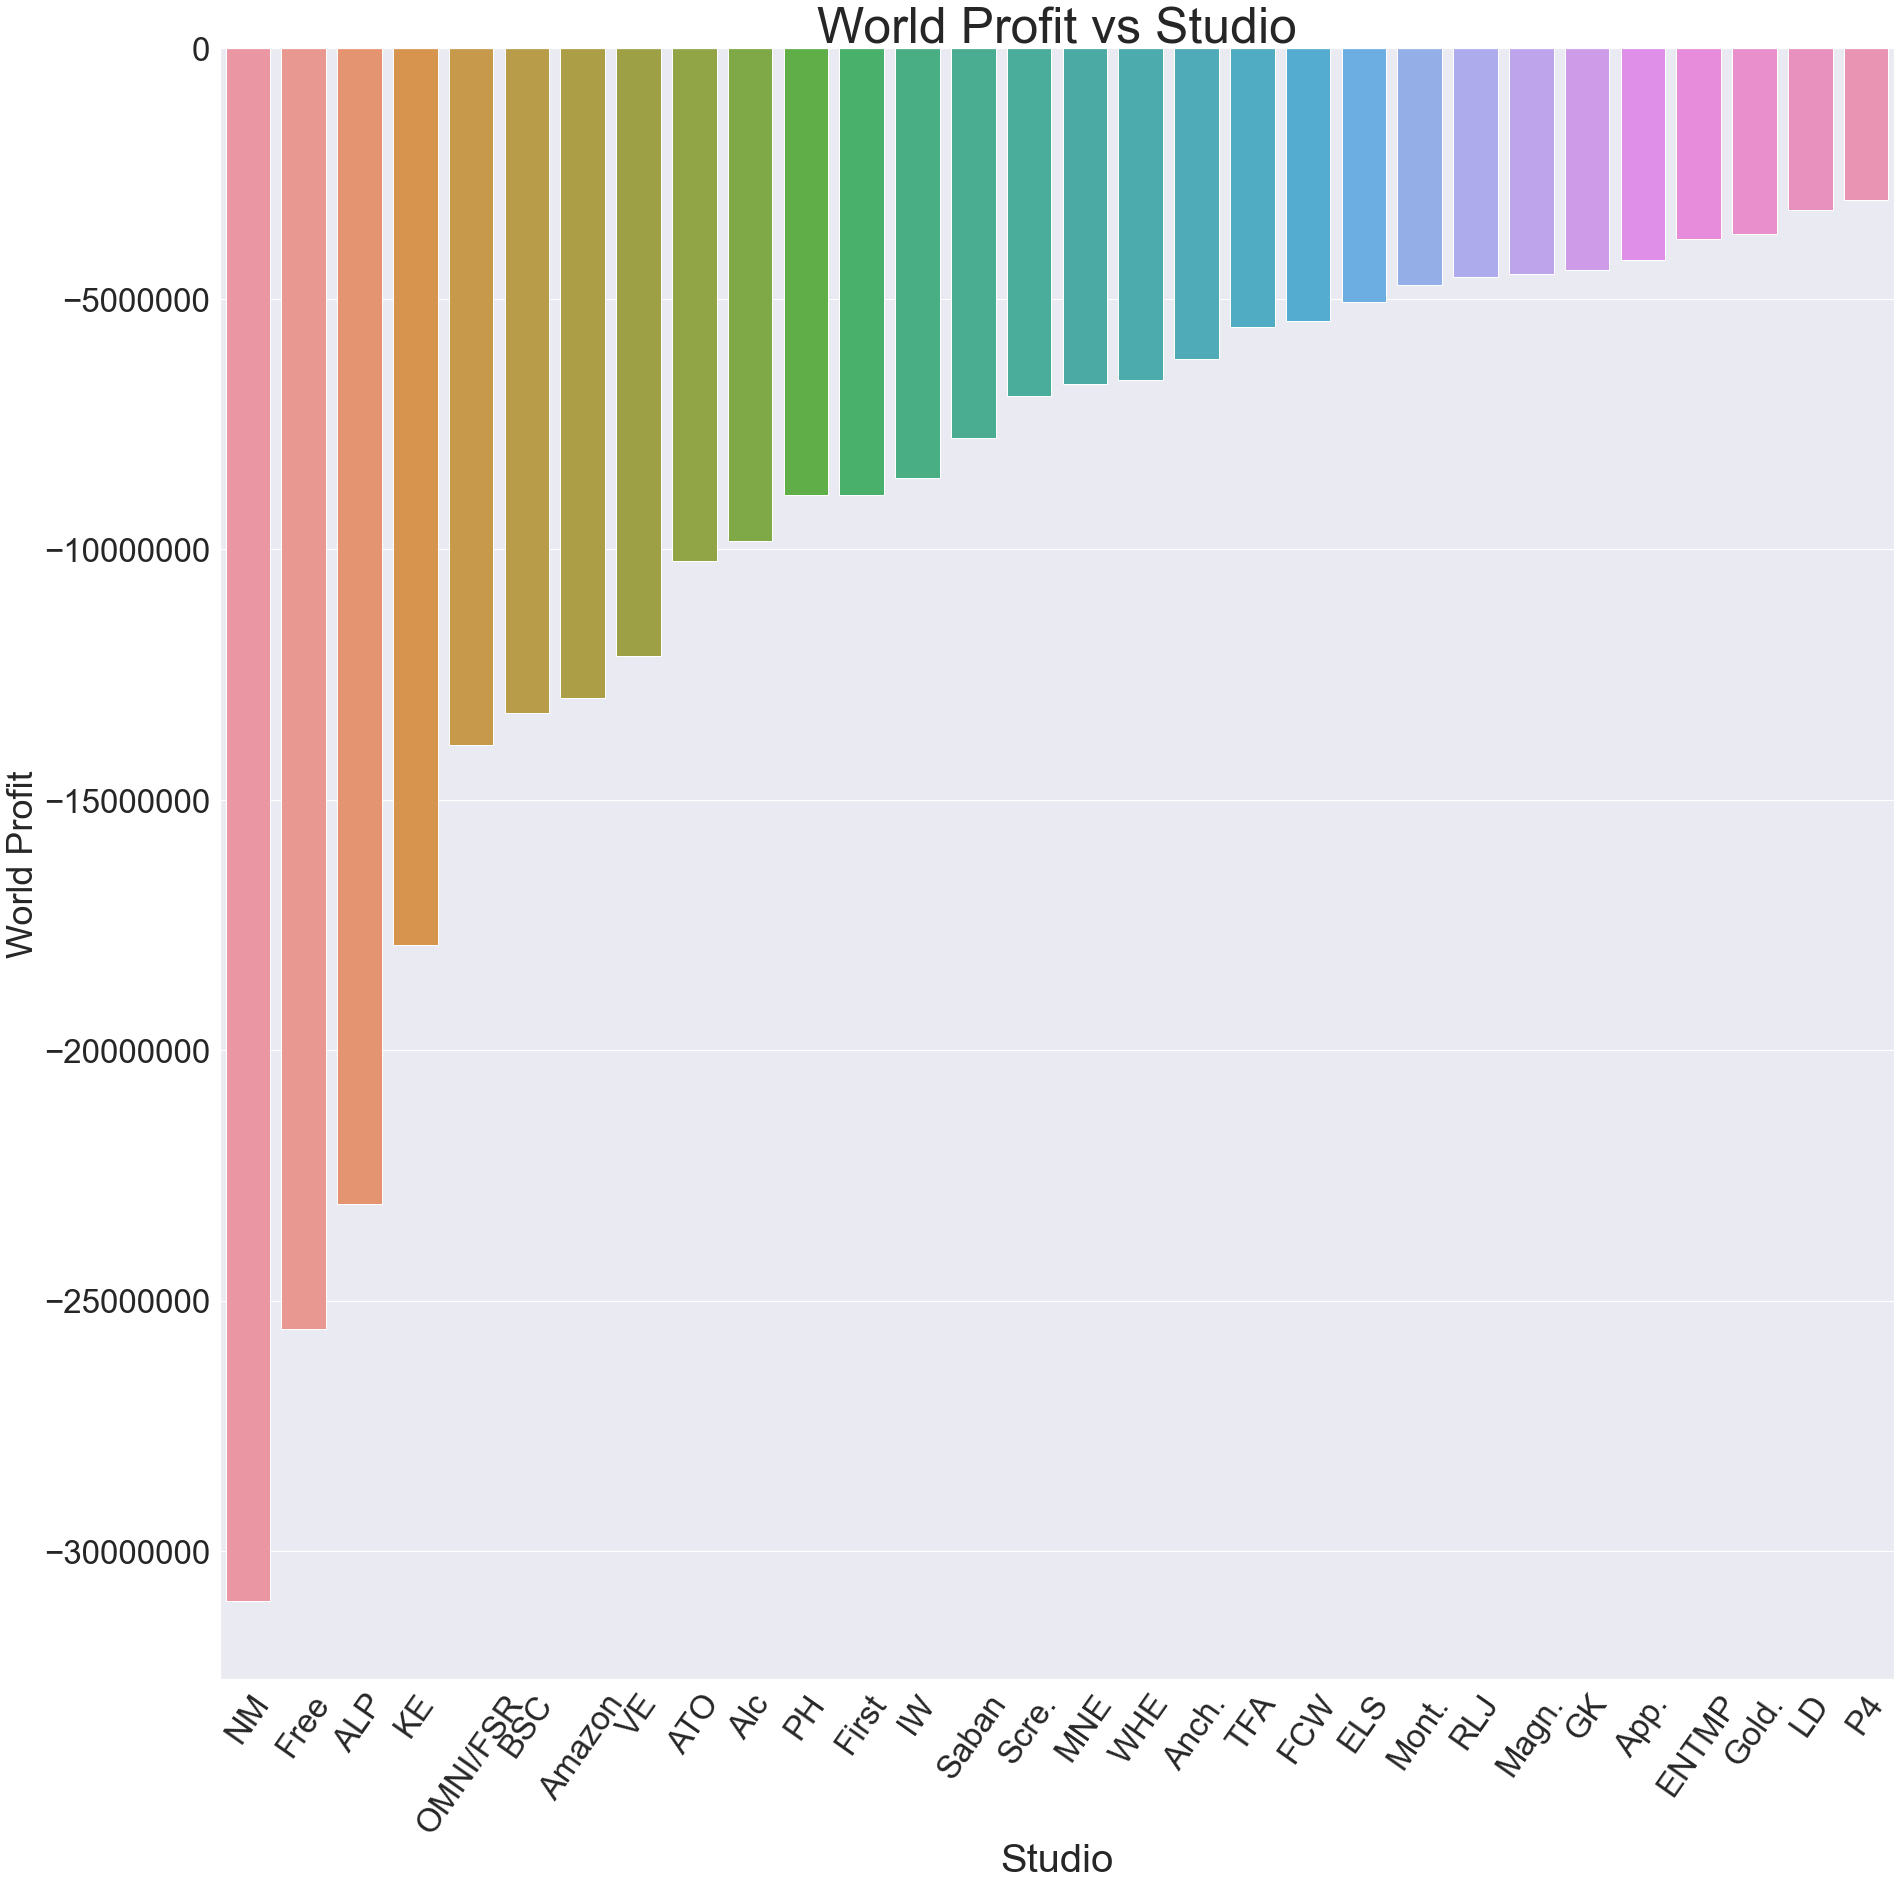

In [107]:
#bar graph for worldwide profit vs studio (negative profits)

fig ,ax = plt.subplots(figsize= (30,30))
ax.set_title('Worldwide Profit vs Studio')
sns.set(font_scale = 3)
sns.barplot(x = 'studio' ,y = 'worldwide_profit',data = joined_df_1_6.groupby('studio').mean().sort_values(by = 'worldwide_profit', ascending = True).reset_index().head(30))
#sns_plot = sns.lineplot(color='blue', linewidth=2.5)
plt.xticks(rotation = 55) #makes the x axis more vertical
ax.set_xlabel("Studio", fontsize = 40)  #labels the axes
ax.set_ylabel("World Profit", fontsize =36)
ax.set_title('World Profit vs Studio', fontsize = 50)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue
ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue

plt.show()